In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format='svg'
import numpy as np
#np.set_printoptions(precision=6, suppress=True)
#np.set_printoptions(threshold=np.inf)
#import pandas as pd
#import seaborn as sns
#import shl_scripts.shl_tools
from shl_scripts.shl_experiments import SHL
#from nengo.utils.ipython import hide_input
import time
#from shl_scripts.shl_encode import sparse_encode
#from shl_scripts.shl_encode import mp
%load_ext autoreload
%autoreload 2
from nengo.utils.ipython import hide_input
import DNN.mnist_loader as data_loader
import DNN.network as network
from shl_scripts.shl_encode import sparse_encode
import pandas as pd

In [2]:
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

## Loading MNIST in the good format for the unsupervised learning algorithm

In [3]:
training_data,validation_data,test_data=data_loader.load_data()

In [4]:
training_image=training_data[0]
training_supervision=training_data[1]
test_image=test_data[0]
test_supervision=test_data[1]

In [5]:
print(training_image.shape)
print(training_supervision.shape)

(50000, 784)
(50000,)


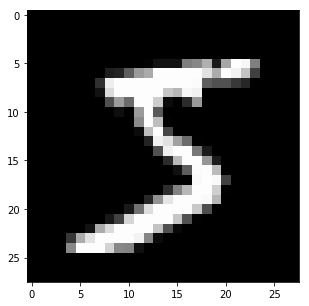

In [6]:
image1=training_image[0].reshape(28,28)
plt.figure(figsize=(5, 5))
ax3=plt.subplot(1,1,1)
plt.imshow(image1,cmap='gray')
plt.show()

## Learning Dictionaries from MNIST database

In [7]:
DEBUG_DOWNSCALE,verbose= 1, 10
patch_size, n_dictionary = (28,28), 30**2
n_iter = 15000
eta, eta_homeo = 0.01360, 0.01
list_figures=['show_dico']

### With a sparseness equal to 10 
A sparseness equal to 10 means than only 1.1% are firing at the sametime (out of 900 neurons)

No cache found /tmp/data_cache/MNIST_i=15000_l0=10_dico.pkl: Learning the dictionary with algo = mp 
 Training on 50000 patches... Iteration   0 /   15000 (elapsed time:   0s,  0.0mn)
Iteration  1501 /   15000 (elapsed time:  914s,  15.0mn)
Iteration  3002 /   15000 (elapsed time:  2045s,  34.0mn)
Iteration  4503 /   15000 (elapsed time:  3042s,  50.0mn)
Iteration  6004 /   15000 (elapsed time:  3911s,  65.0mn)
Iteration  7505 /   15000 (elapsed time:  4890s,  81.0mn)
Iteration  9006 /   15000 (elapsed time:  6040s,  100.0mn)
Iteration  10507 /   15000 (elapsed time:  7214s,  120.0mn)
Iteration  12008 /   15000 (elapsed time:  8637s,  143.0mn)
Iteration  13509 /   15000 (elapsed time:  10197s,  169.0mn)
Learning code... done (total time:  11615s,  193.6mn)
done in 11615.05s.


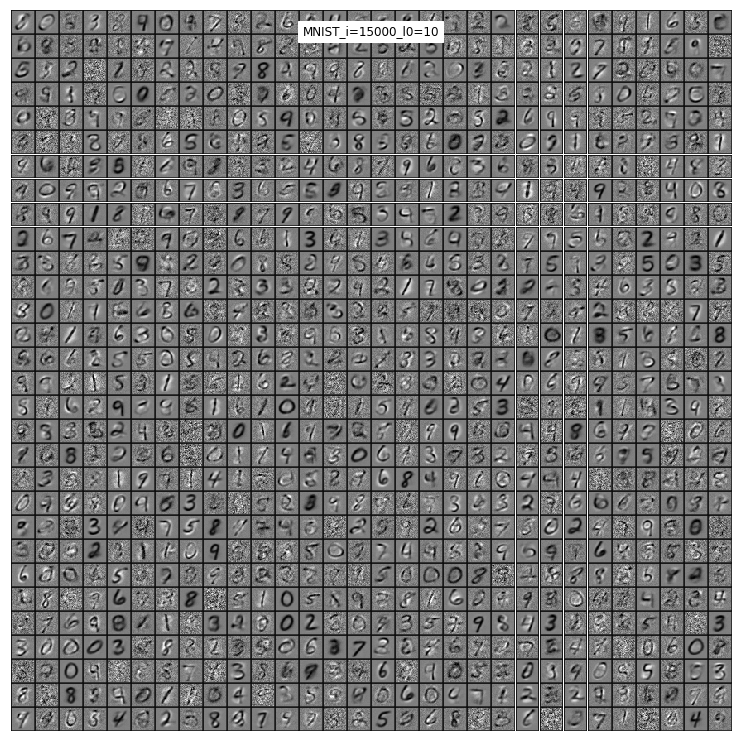

In [8]:
l0_sparseness = 10
shl_l0_10 = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
            eta=eta, alpha_homeo=0, eta_homeo=eta_homeo, verbose=verbose,
            n_iter=n_iter, patch_size=patch_size, l0_sparseness=l0_sparseness,
            n_dictionary=n_dictionary) #record_each=1000)
dico_l0_10 = shl_l0_10.learn_dico(data=training_image,matname='MNIST_i=15000_l0=10',list_figures=list_figures)

### With a sparseness equal to 45
A sparseness equal to 45 means than only 5% are firing at the sametime (out of 900 neurons)

No cache found /tmp/data_cache/MNIST_i=30000_l0=45_dico.pkl: Learning the dictionary with algo = mp 
 Training on 50000 patches... Iteration   0 /   15000 (elapsed time:   0s,  0.0mn)
Iteration  1501 /   15000 (elapsed time:  4116s,  68.0mn)
Iteration  3002 /   15000 (elapsed time:  8089s,  134.0mn)
Iteration  4503 /   15000 (elapsed time:  11943s,  199.0mn)
Iteration  6004 /   15000 (elapsed time:  15663s,  261.0mn)
Iteration  7505 /   15000 (elapsed time:  18867s,  314.0mn)
Iteration  9006 /   15000 (elapsed time:  21629s,  360.0mn)
Iteration  10507 /   15000 (elapsed time:  24401s,  406.0mn)
Iteration  12008 /   15000 (elapsed time:  27163s,  452.0mn)
Iteration  13509 /   15000 (elapsed time:  29905s,  498.0mn)
Learning code... done (total time:  32433s,  540.6mn)
done in 32433.70s.


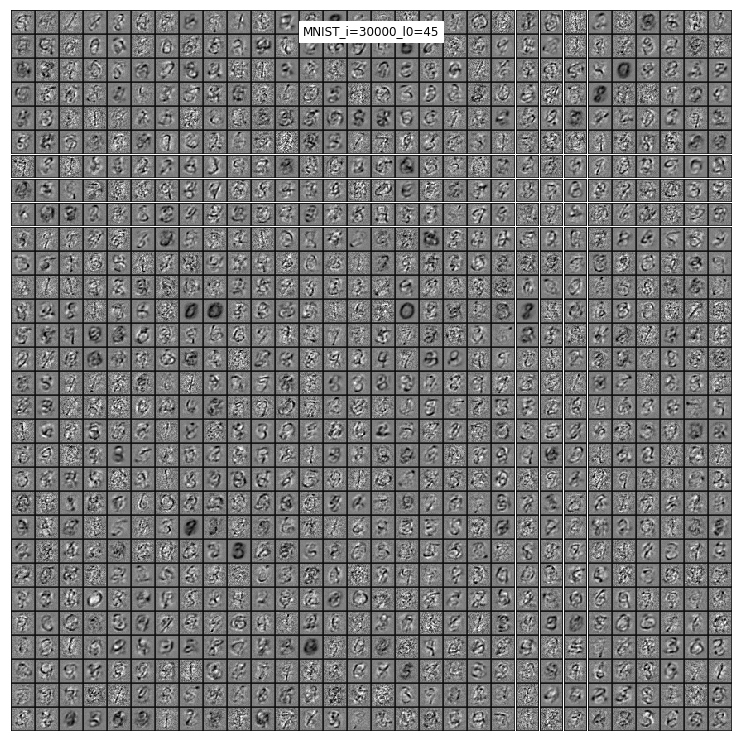

In [ ]:
l0_sparseness = 45
shl_l0_45 = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
            eta=eta, alpha_homeo=0, eta_homeo=eta_homeo, verbose=verbose,
            n_iter=n_iter, patch_size=patch_size, l0_sparseness=l0_sparseness,
            n_dictionary=n_dictionary) #record_each=1000)
dico_l0_45 = shl_l0_45.learn_dico(data=training_image,matname='MNIST_i=30000_l0=45',list_figures=list_figures)

### With a sparseness equal to 90
A sparseness equal to 90 means than only 10% are firing at the sametime (out of 900 neurons)

In [ ]:
l0_sparseness = 90
shl_l0_90 = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
            eta=eta, alpha_homeo=0, eta_homeo=eta_homeo, verbose=verbose,
            n_iter=n_iter, patch_size=patch_size, l0_sparseness=l0_sparseness,
            n_dictionary=n_dictionary) #record_each=1000)
dico_l0_90 = shl_l0_90.learn_dico(data=training_image,matname='MNIST_i=30000_l0=90',list_figures=list_figures)

No cache found /tmp/data_cache/MNIST_i=30000_l0=90_dico.pkl: Learning the dictionary with algo = mp 
 Training on 50000 patches... Iteration   0 /   15000 (elapsed time:   0s,  0.0mn)
Iteration  1501 /   15000 (elapsed time:  3981s,  66.0mn)
Iteration  3002 /   15000 (elapsed time:  7969s,  132.0mn)
Iteration  4503 /   15000 (elapsed time:  11926s,  198.0mn)
Iteration  6004 /   15000 (elapsed time:  15779s,  262.0mn)


### Comparing classification performance on MNIST with different dictionary size, sparseness and algorithm

We compared 3 sparse coding algorithm for classification on MNIST. For each algorithm wa tested different dictionary size and different sparseness.
Calculation file for Pcum is : '2017-27-04-MNIST_classification_with Pcum'
Calculation file for Comp is :
Calculation file for MP is :

Below is a concatenated table with the recognition accuracy : 


In [ ]:
dico_size=[144,225,324,441,576,729]
#Sparsness=10  with othogonal matching pursuit : Optimization file 4, Optimization 4
data1={'Accuracy Pcum' : [0.8988,0.7589,0.6797,0.6151,0.5395,0.5278],
        'Accuracy Comp' : [0.9236,0.9179,0.9169,0.9102,0.9122,0.9184],
        'Accuracy MP' : [0.9323,0.9211,0.9211,0.9194,0.9203,0.9208]}
'''
#Sparsness=20 with othogonal matching pursuit : Optimization file 5, Optimization 
d23={'KL_homeo' : [25.909342683187461, 37.772497829013439, 61.806115927834625, 46.425709641610055, 45.555932954393164, 29.637075639528085, 40.785854693732631, 56.08181948336513, 56.582501195192926, 61.957147465366347],
   'RMSE_homeo' : [1.4748618563609477, 1.2536011566127807, 1.1286341662721686, 1.1072972665649163, 1.0721205817716413, 1.02588768881601, 0.9913529445485969, 0.9766691914817276, 0.9861283817591897, 1.0202304063771397]}

#Sparsness=30 with othogonal matching pursuit : Optimization file 6, Optimization 
d24={'KL_homeo' : [37.388409440662379, 44.106393179436708, 69.614964839313302, 93.95291455640978, 137.93862712328877, 81.369145588276126, 69.751210396572944, 0.016983252420413979, 4.4665471517815201, 92.283773955186163],
   'RMSE_homeo' : [1.1685779126444342, 0.9760504369538927, 0.8350570479955792, 0.803656790015909, 0.7996565550840187, 0.7755211763620165, 0.7488473506339464, 1.5710557489874117, 0.9045342612532506, 0.7418076979000451]}
'''

nb_dic=pd.DataFrame(data1,index=dico_size)
nb_dic.index.name='dico size'

sparseness=[5,10,15,20,25,30,35]
data2={'Accuracy Pcum' : [0.8974,0.8302,0.7665,0.6832,0.6996,0.7361,0.7652],
        'Accuracy Comp' : [0.9119,0.9185,0.9193,0.9145,0.9168,0.9135,0.9186],
        'Accuracy MP' : [0.8204,0.8378,0.9274,0.9229,0.9253,0.9139,0]}

nb_l0=pd.DataFrame(data2,index=sparseness)
nb_l0.index.name='dico sparseness'

hide_input()

#### Different size of dictionary with a defined sparseness of 10. The number of iteration is 2^14 (=16384)

In [ ]:

print(nb_dic)
hide_input()

#### Different sparseness with a defined size of dico of 256 The number of iteration is 2^14 (=16384)

In [ ]:
# nb dictionary=256
print(nb_l0)
hide_input()

### Comparing reconstruction error on MNIST with different dictionary size, sparseness and algorithm

In [ ]:
dico_size=[16,25,36,49,64,81,100,144,169,196,225,256,289]

dataL0_5={'Error Pcum' : [0.1973,0.1654,0.1549,0.1512,0.1457,0.1463,0.1424,0.1367,0.1362,0.1363,0.1392,0.1412,0.1438],
        'Error MP' : [0.2133,0.1614,0.1524,0.1550,0.1517,0.1570,0.1562,0.1607,0.1599,0.1643,0.1659,0.1673,0.1621],
        'Error Comp' : [0.1970,0.1591,0.1510,0.1481,0.1498,0.1484,0.1538,0.1564,0.1593,0.1590,0.1596,0.1598,0.1641]}



data_L0_5=pd.DataFrame(dataL0_5,index=dico_size)
data_L0_5.index.name='dico size'

dataL0_10={'Error Pcum' : [0.1994,0.1984,0.1427,0.1371,0.1329,0.1308,0.1268,0.1149,0.1219,0.1206,0.1214,0.1227,0.1256],
        'Error MP' : [0.2126,0.1810,0.1446,0.1361,0.1373,0.1398,0.1405,0.1296,0.1430,0.1436,0.1450,0.1443,0.1441],
        'Error Comp' : [0.2147,0.1941,0.1425,0.1370,0.1339,0.1355,0.1357,0.1373,0.1377,0.1370,0.1399,0.1408,0.1423]}


data_L0_10=pd.DataFrame(dataL0_10,index=dico_size)
data_L0_10.index.name='dico size'

dataL0_15={'Error Pcum' : [0.2045,0.1700,0.1567,0.1299,0.1265,0.1224,0.1180,0.1143,0.1131,0.1136,0.1121,0.1131,0.1169],
        'Error MP' : [0.2013,0.1915,0.1797,0.1300,0.1256,0.1273,0.1276,0.1288,0.1287,0.1300,0.1331,0.1324,0.1322],
        'Error Comp' : [0.2097,0.1787,0.1581,0.1292,0.1245,0.1226,0.1240,0.1242,0.1247,0.1262,0.1276,0.1277,0.1268]}
data_L0_15=pd.DataFrame(dataL0_15,index=dico_size)
data_L0_15.index.name='dico size'

hide_input()

#### Recontruction error on MNIST Dataset, after 2000 iteration, and with a L0=5

In [ ]:
print(data_L0_5)
data_L0_5.plot()

#### Recontruction error on MNIST Dataset, after 2000 iteration, and with a L0=10

In [ ]:
print(data_L0_10)
data_L0_10.plot()

#### Recontruction error on MNIST Dataset, after 2000 iteration, and with a L0=15

In [ ]:
print(data_L0_15)
data_L0_15.plot()

### Plotting the error evolution with iteration

The following curve is obtain with 10000 iteration, with a sparseness equal to 5, on 144 dictionary

In [ ]:
list_figures=['show_dico']
shl_Pcum = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=144, record_each=50,l0_sparseness=5)
dico_Pcum = shl_Pcum.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_144dico_l0=5_iter=10000',list_figures=list_figures)

shl_Comp = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0.02,
                n_dictionary=144, record_each=50,l0_sparseness=5)
dico_Comp = shl_Comp.learn_dico(data=training_image,matname='2017-04-28 MNIST_COMP144_dico_l0=5_iter=1000',list_figures=list_figures)

shl_MP = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=144, record_each=50,l0_sparseness=5)
dico_MP = shl_MP.learn_dico(data=training_image,matname='2017-04-28 MNIST_MP 144dico_l0=5_iter=10000',list_figures=list_figures)



In [ ]:
type(dico_Pcum.record['error'])

In [ ]:
index=np.arange(0,10000,50)
df1=pd.DataFrame()
df1['MEUL']=dico_Pcum.record['error']
df1['SN']=dico_Comp.record['error']
df1['MP']=dico_MP.record['error']

error=pd.DataFrame(df1,index=index)
error.plot()

The following curve is obtain with 10000 iteration, with a sparseness equal to 15, on 256 dictionary

In [ ]:
list_figures=['show_dico']
shl_Pcum2 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=256, record_each=50,l0_sparseness=15)
dico_Pcum2 = shl_Pcum2.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_256dico_l0=15_iter=10000',list_figures=list_figures)

shl_Comp2 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0.02,
                n_dictionary=256, record_each=50,l0_sparseness=15)
dico_Comp2 = shl_Comp2.learn_dico(data=training_image,matname='2017-04-28 MNIST_COMP256_dico_l0=15_iter=1000',list_figures=list_figures)

shl_MP2 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=256, record_each=50,l0_sparseness=15)
dico_MP2 = shl_MP2.learn_dico(data=training_image,matname='2017-04-28 MNIST_MP 256dico_l0=15_iter=10000',list_figures=list_figures)



In [ ]:
index=np.arange(0,10000,50)
df2=pd.DataFrame()
df2['MEUL']=dico_Pcum2.record['error']
df2['SN']=dico_Comp2.record['error']
df2['MP']=dico_MP2.record['error']

#error2=pd.DataFrame(df2,index=index)
#error2.plot()
a=df2.plot()
a.set_ylim(0)

The following curve is obtain with 10000 iteration, with a sparseness equal to 15, on 400 dictionary

In [ ]:
list_figures=['show_dico']
shl_Pcum3 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=400, record_each=50,l0_sparseness=15)
dico_Pcum3 = shl_Pcum3.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_400dico_l0=15_iter=10000',list_figures=list_figures)

shl_Comp3 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0.02,
                n_dictionary=400, record_each=50,l0_sparseness=15)
dico_Comp3 = shl_Comp3.learn_dico(data=training_image,matname='2017-04-28 MNIST_COMP400_dico_l0=15_iter=1000',list_figures=list_figures)

shl_MP3 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=400, record_each=50,l0_sparseness=15)
dico_MP3 = shl_MP3.learn_dico(data=training_image,matname='2017-04-28 MNIST_MP 400dico_l0=15_iter=10000',list_figures=list_figures)

In [ ]:
index=np.arange(0,10000,50)
df3=pd.DataFrame()
df3['MEUL']=dico_Pcum3.record['error']
df3['SN']=dico_Comp3.record['error']
df3['MP']=dico_MP3.record['error']

a=df3.plot()
a.set_ylim(0)
#error3=pd.DataFrame(df3,index=index)
#error3.set_ylim(0)
#error3.plot()

The following curve is obtain with 10000 iteration, with a sparseness equal to 15, on 900 dictionary

In [ ]:
list_figures=['show_dico']

shl_Pcum4 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=900, record_each=50,l0_sparseness=15)
dico_Pcum4 = shl_Pcum4.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_900dico_l0=15_iter=10000',list_figures=list_figures)

shl_Comp4 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0.02,
                n_dictionary=900, record_each=50,l0_sparseness=15)
dico_Comp4 = shl_Comp4.learn_dico(data=training_image,matname='2017-04-28 MNIST_COMP900_dico_l0=15_iter=1000',list_figures=list_figures)

shl_MP4 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=900, record_each=50,l0_sparseness=15)
dico_MP4 = shl_MP4.learn_dico(data=training_image,matname='2017-04-28 MNIST_MP 900dico_l0=15_iter=10000',list_figures=list_figures)

In [ ]:
index=np.arange(0,10000,50)
df4=pd.DataFrame()
df4['MEUL']=dico_Pcum4.record['error']
df4['SN']=dico_Comp4.record['error']
df4['MP']=dico_MP4.record['error']

a=df4.plot()
a.set_ylim(0)
#error4=pd.DataFrame(df4,index=index)
#error4.plot()

### Explication of the 'bump'

Let's overlay 3 reconstruction error's curve. Those 3 curves have the same number of dictionary (900), but differ in sparsess

In [ ]:
shl_Pcum_l0_15 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=900, record_each=50,l0_sparseness=15)
dico_Pcum_l0_15 = shl_Pcum_l0_15.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_900dico_l0=15_iter=10000')

shl_Pcum_l0_50 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=900, record_each=50,l0_sparseness=50)
dico_Pcum_l0_50 = shl_Pcum_l0_50.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_900dico_l0=50_iter=10000')

shl_Pcum_l0_90 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=900, record_each=50,l0_sparseness=90)
dico_Pcum_l0_90 = shl_Pcum_l0_90.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_900dico_l0=90_iter=10000')

In [ ]:
index=np.arange(0,10000,50)
df5=pd.DataFrame()
df5['MEUL l0=15']=dico_Pcum_l0_15.record['error']
df5['MEUL l0=50']=dico_Pcum_l0_50.record['error']
df5['MEUL l0=90']=dico_Pcum_l0_90.record['error']

a=df5.plot()
a.set_ylim(0)

In [ ]:
index=np.arange(0,10000,50)
df6=pd.DataFrame()
df6['MEUL l0=15']=dico_Pcum_l0_15.record['entropy']
df6['MEUL l0=50']=dico_Pcum_l0_50.record['entropy']
df6['MEUL l0=90']=dico_Pcum_l0_90.record['entropy']

a=df6.plot()
a.set_ylim(0.98)

In [ ]:
shl_Pcum_l0_15_etah_01 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.01, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=900, record_each=50,l0_sparseness=15)
dico_Pcum_l0_15_etah_01 = shl_Pcum_l0_15_etah_01.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_900dico_l0=15_iter=10000')

shl_Pcum_l0_15_etah_02b = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.02, eta_homeo=0.02, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=900, record_each=50,l0_sparseness=15)
dico_Pcum_l0_15_etah_02b = shl_Pcum_l0_15_etah_02b.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_900dico_l0=15_iter=10000_etah_0.02')

shl_Pcum_l0_15_etah_02 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.02, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=900, record_each=50,l0_sparseness=15)
dico_Pcum_l0_15_etah_02 = shl_Pcum_l0_15_etah_02.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_900dico_l0=15_iter=10000_etah_0.02b')

shl_Pcum_l0_15_etah_03 = SHL(DEBUG_DOWNSCALE=1, 
                eta=0.01, eta_homeo=0.03, verbose=0,
                n_iter=10000, patch_size=(28,28), alpha_homeo = 0,
                n_dictionary=900, record_each=50,l0_sparseness=15)
dico_Pcum_l0_15_etah_03 = shl_Pcum_l0_15_etah_03.learn_dico(data=training_image,matname='2017-04-28 MNIST_Pcum_900dico_l0=15_iter=10000_etah_0.03')



In [ ]:
index=np.arange(0,10000,50)
df7=pd.DataFrame()
df7['MEUL l0=15 eta_homeo=0.01']=dico_Pcum_l0_15_etah_01.record['error']
#df7['MEUL l0=15 eta_homeo=0.02 eta=0.02']=dico_Pcum_l0_15_etah_02b.record['error']
df7['MEUL l0=15 eta_homeo=0.02 eta=0.01']=dico_Pcum_l0_15_etah_02.record['error']
df7['MEUL l0=15 eta_homeo=0.03 eta=0.01']=dico_Pcum_l0_15_etah_03.record['error']
a=df7.plot()
a.set_ylim(0)

In [ ]:
index=np.arange(0,10000,50)
df7=pd.DataFrame()
df7['MEUL l0=15 eta_homeo=0.01']=dico_Pcum_l0_15_etah_01.record['entropy']
#df7['MEUL l0=15 eta_homeo=0.02 eta=0.02']=dico_Pcum_l0_15_etah_02b.record['error']
df7['MEUL l0=15 eta_homeo=0.02 eta=0.01']=dico_Pcum_l0_15_etah_02.record['entropy']
df7['MEUL l0=15 eta_homeo=0.03 eta=0.01']=dico_Pcum_l0_15_etah_03.record['entropy']
a=df7.plot()
a.set_ylim(0.98)